References: 
> https://github.com/rouseguy/TimeSeriesAnalysiswithPython/

In [1]:
%cd ../..
%run cryptolytic/notebooks/init.ipynb

import pandas as pd
import cryptolytic.start as start
import cryptolytic.viz.plot as plot
import cryptolytic.data.sql as sql
import cryptolytic.data.historical as h

from matplotlib.pylab import rcParams
from IPython.core.display import HTML
from pandas.plotting import register_matplotlib_converters # to stop a warning message


ohclv = ['open', 'high', 'close', 'low', 'volume']
plt.style.use('ggplot')
rcParams['figure.figsize'] = 20,7
start.init()
register_matplotlib_converters()


# Make math readable
HTML("""
<style>
.MathJax {
    font-size: 2rem;
}
</style>""")

/home/me/Documents/Git/Lambda-School-Labs/cryptolytic-ds
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### Loading candlestick data for end of 2019 on hitbtc

In [3]:
df = sql.get_some_candles(
    info={'start':1574368000, 'end':1579046400, 'exchange_id':'hitbtc',
          'trading_pair':'btc_usd', 'period':300}, n=5e4)
df2 = df.copy()  # mutable copy
train_test_pivot = int(len(df)*0.8)
df['diff'] = df['high'] - df['low']

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

In [4]:
# Import statsmodel


In [5]:
df.index.max()

Timestamp('2020-01-15 00:00:00')

In [6]:
df.shape, df.head()

((15595, 8),
                         open    close     high      low   timestamp  \
 datetime                                                              
 2019-11-21 20:30:00  7625.38  7626.31  7632.30  7623.67  1574368200   
 2019-11-21 20:35:00  7625.64  7600.47  7625.64  7594.11  1574368500   
 2019-11-21 20:40:00  7600.00  7598.88  7605.62  7583.80  1574368800   
 2019-11-21 20:45:00  7599.79  7590.21  7600.64  7576.03  1574369100   
 2019-11-21 20:50:00  7583.23  7584.00  7591.68  7579.35  1574369400   
 
                         volume  period   diff  
 datetime                                       
 2019-11-21 20:30:00  131.42956     300   8.63  
 2019-11-21 20:35:00   84.75415     300  31.53  
 2019-11-21 20:40:00  208.57723     300  21.82  
 2019-11-21 20:45:00   92.76753     300  24.61  
 2019-11-21 20:50:00  347.91620     300  12.33  )

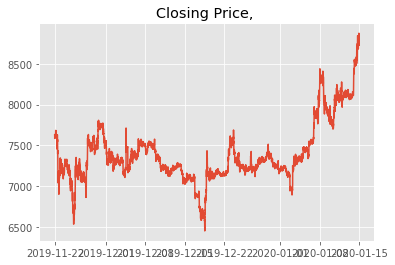

In [7]:
plt.title('Closing Price, ')
plt.plot(df['close'])

In [8]:
plot.candlestick(df)

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Baseline Prediction using Moving Average

In [10]:
# the predicted price for each day will be the average of a set of previously 
# observed values
preds = []
for i in range(0, test.shape[0]):
    a = train['close'][len(train)-len(test)+i:].sum() + sum(preds)
    b = a / len(test)
    preds.append(b)

print("preds", preds[0:5])

# Check the results 
rms = np.sqrt(np.mean(
    np.power( (np.array(test['close'])-preds), 2) ))

print("Root Mean Squared Error", rms)

preds [7245.68630330234, 7245.680258513402, 7245.673509638286, 7245.665614001749, 7245.6606654971]
Root Mean Squared Error 785.3508040484846


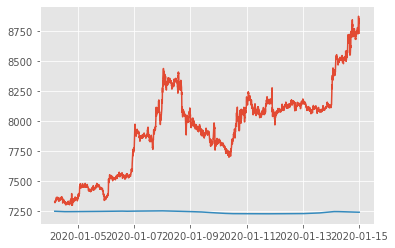

In [11]:
plt.plot(test.index, test['close'])
plt.plot(test.iloc[:len(preds)].index, preds)

# Normalize data

In [12]:
from sklearn import neighbors
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
scaler = MinMaxScaler(feature_range=(0, 1))

In [13]:
df2 = pd.DataFrame(scaler.fit_transform(df[ohclv]), columns=df[ohclv].columns)
df2.index = df.index

In [14]:
df2

open      high     close       low    volume
datetime                                                             
2019-11-21 20:30:00  0.485320  0.482954  0.485549  0.496392  0.062891
2019-11-21 20:35:00  0.485427  0.480195  0.474903  0.484048  0.040556
2019-11-21 20:40:00  0.474826  0.471901  0.474248  0.479742  0.099807
2019-11-21 20:45:00  0.474739  0.469838  0.470676  0.476497  0.044391
2019-11-21 20:50:00  0.467892  0.466127  0.468117  0.477884  0.166483
2019-11-21 20:55:00  0.468777  0.468525  0.473667  0.478506  0.002596
2019-11-21 21:00:00  0.473747  0.477071  0.480362  0.485175  0.004620
2019-11-21 21:05:00  0.481074  0.476901  0.473960  0.485672  0.005766
2019-11-21 21:10:00  0.474392  0.470779  0.471463  0.482252  0.075321
2019-11-21 21:15:00  0.471634  0.469768  0.473333  0.480556  0.018046
2019-11-21 21:20:00  0.473313  0.477187  0.481833  0.484916  0.002238
2019-11-21 21:25:00  0.480586  0.475344  0.477045  0.488549  0.001150
2019-11-21 21:30:00  0.477237  0.474731  0.479670  0.488817  0.001557
2019-11-21 21:35:00  0.479763  0.480679  0.479447  0.491310  0.011264
2019-11-21 21:40:00  0.479928  0.477390  0.478166  0.489840  0.035890
2019-11-21 21:45:00  0.478634  0.475551  0.478879  0.490140  0.060970
2019-11-21 21:50:00  0.479114  0.474445  0.478331  0.489710  0.025438
2019-11-21 21:55:00  0.478490  0.473782  0.471879  0.483208  0.015461
2019-11-21 22:00:00  0.472809  0.468799  0.473193  0.483129  0.000745
2019-11-21 22:05:00  0.473429  0.468840  0.473589  0.484035  0.002401
2019-11-21 22:10:00  0.473809  0.470559  0.475179  0.484996  0.003402
2019-11-21 22:15:00  0.475099  0.472734  0.477787  0.486779  0.061199
2019-11-21 22:20:00  0.478002  0.478658  0.482789  0.489714  0.010096
2019-11-21 22:25:00  0.483269  0.478210  0.482047  0.492045  0.003136
2019-11-21 22:30:00  0.481669  0.477738  0.482533  0.492650  0.002764
2019-11-21 22:35:00  0.482686  0.478761  0.483131  0.494087  0.004451
2019-11-21 22:40:00  0.483306  0.478268  0.481816  0.493711  0.007594
2019-11-21 22:45:00  0.482021  0.477009  0.476984  0.488086  0.001622
2019-11-21 22:50:00  0.476199  0.475157  0.479798  0.485497  0.005530
2019-11-21 22:55:00  0.479858  0.477162  0.482257  0.491589  0.002052
...                       ...       ...       ...       ...       ...
2020-01-14 21:35:00  0.934979  0.934180  0.936025  0.951266  0.074947
2020-01-14 21:40:00  0.937468  0.936930  0.938299  0.951650  0.075731
2020-01-14 21:45:00  0.940114  0.938629  0.941043  0.955053  0.014052
2020-01-14 21:50:00  0.943120  0.946558  0.949102  0.959488  0.002919
2020-01-14 21:55:00  0.950690  0.949992  0.939959  0.957910  0.002219
2020-01-14 22:00:00  0.943901  0.941392  0.940911  0.958520  0.001313
2020-01-14 22:05:00  0.942847  0.943426  0.944763  0.956386  0.013081
2020-01-14 22:10:00  0.946700  0.945725  0.948274  0.961530  0.261679
2020-01-14 22:15:00  0.949946  0.949474  0.945843  0.964028  0.040786
2020-01-14 22:20:00  0.948094  0.947701  0.950239  0.964512  0.112025
2020-01-14 22:25:00  0.951596  0.953877  0.956031  0.967920  0.003638
2020-01-14 22:30:00  0.957951  0.955621  0.958116  0.971983  0.002312
2020-01-14 22:35:00  0.959956  0.962597  0.961054  0.976314  0.003452
2020-01-14 22:40:00  0.962900  0.962796  0.952641  0.969540  0.045108
2020-01-14 22:45:00  0.954316  0.955149  0.954750  0.963476  0.173177
2020-01-14 22:50:00  0.956615  0.954271  0.948747  0.963631  0.091615
2020-01-14 22:55:00  0.950562  0.951653  0.942386  0.958465  0.011087
2020-01-14 23:00:00  0.944182  0.945804  0.939354  0.955701  0.010347
2020-01-14 23:05:00  0.940895  0.941069  0.941636  0.955037  0.005764
2020-01-14 23:10:00  0.943326  0.951756  0.953333  0.959697  0.008485
2020-01-14 23:15:00  0.953651  0.961280  0.963011  0.967849  0.120976
2020-01-14 23:20:00  0.965385  0.973625  0.966319  0.978736  0.086105
2020-01-14 23:25:00  0.966629  0.983239  0.982346  0.981843  0.152789
2020-01-14 23:30:00  0.985082  1.000000  1.000000  0.991322  0.097039
2020-01-14 23:35:00  1.000000  0.99

# KMeans Model With Hyperparameter Tuning

In [15]:
params = {'n_neighbors' : range(2, 10)}
knn = neighbors.KNeighborsRegressor()
model = RandomizedSearchCV(knn, params, cv=5)
x_features = df2.drop('close', axis=1).columns
y_feature = 'close'
train = df2[:train_test_pivot]
test = df2[train_test_pivot+1:]

In [16]:
import cryptolytic.util.core as util
util.bdir(model)

['classes_',
 'cv',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'fit_params',
 'get_params',
 'iid',
 'inverse_transform',
 'n_iter',
 'n_jobs',
 'param_distributions',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'refit',
 'return_train_score',
 'score',
 'scoring',
 'set_params',
 'transform',
 'verbose']

In [17]:
df.iloc[:train_test_pivot].tail(1)

open    close     high      low   timestamp  \
datetime                                                              
2020-01-04 04:05:00  7320.07  7320.78  7324.72  7319.08  1578110700   

                        volume  period  diff  
datetime                                      
2020-01-04 04:05:00  228.81578     300  5.64

In [18]:
preds[0:5]

[7245.68630330234,
 7245.680258513402,
 7245.673509638286,
 7245.665614001749,
 7245.6606654971]

In [19]:
model.fit(train[x_features], train[y_feature])
preds = model.predict(test[x_features])

/home/me/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning:

The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.



In [20]:
rms=np.sqrt(np.mean(np.power((np.array(test[y_feature])-np.array(preds)),2)))
rms

0.14343089767346479

/home/me/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/me/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



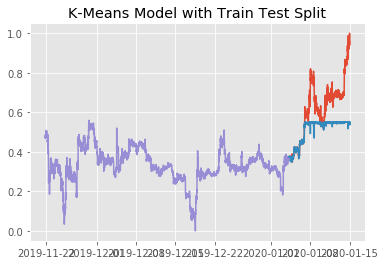

In [21]:
test['preds']  = 0
test['preds'] = preds
plt.title('K-Means Model with Train Test Split')
plt.plot(test[[y_feature, 'preds']])
plt.plot(train['close'])

In [22]:
test.min()

open      0.349067
high      0.344996
close     0.349103
low       0.349851
volume    0.000015
preds     0.348289
dtype: float64

In [23]:
test

open      high     close       low    volume  \
datetime                                                                
2020-01-04 04:15:00  0.361136  0.356135  0.358946  0.369040  0.116510   
2020-01-04 04:20:00  0.357708  0.352407  0.358180  0.366371  0.001401   
2020-01-04 04:25:00  0.357489  0.355418  0.361175  0.367996  0.001324   
2020-01-04 04:30:00  0.361719  0.359453  0.364549  0.371570  0.001098   
2020-01-04 04:35:00  0.363588  0.359200  0.364261  0.372773  0.002337   
2020-01-04 04:40:00  0.363133  0.358712  0.362984  0.372381  0.046105   
2020-01-04 04:45:00  0.362678  0.358786  0.363247  0.373237  0.127355   
2020-01-04 04:50:00  0.363716  0.360518  0.365604  0.374068  0.106949   
2020-01-04 04:55:00  0.365548  0.360891  0.364850  0.373679  0.001467   
2020-01-04 05:00:00  0.364051  0.358973  0.364710  0.373404  0.000100   
2020-01-04 05:05:00  0.362124  0.358691  0.363618  0.372564  0.001209   
2020-01-04 05:10:00  0.363150  0.358882  0.363985  0.372351  0.036680   
2020-01-04 05:15:00  0.362906  0.359275  0.364805  0.371879  0.080594   
2020-01-04 05:20:00  0.364353  0.364764  0.370470  0.374928  0.109657   
2020-01-04 05:25:00  0.369802  0.365696  0.368092  0.378440  0.000945   
2020-01-04 05:30:00  0.369777  0.366011  0.371710  0.380006  0.000789   
2020-01-04 05:35:00  0.371460  0.374292  0.376493  0.382107  0.002839   
2020-01-04 05:40:00  0.373523  0.370940  0.370313  0.379513  0.001012   
2020-01-04 05:45:00  0.370203  0.364760  0.368587  0.377638  0.041303   
2020-01-04 05:50:00  0.368781  0.366123  0.371557  0.379117  0.185608   
2020-01-04 05:55:00  0.369856  0.365642  0.368739  0.377613  0.064345   
2020-01-04 06:00:00  0.368649  0.365108  0.369567  0.377997  0.014371   
2020-01-04 06:05:00  0.369901  0.367978  0.372942  0.380532  0.000592   
2020-01-04 06:10:00  0.372027  0.367904  0.372839  0.382411  0.000386   
2020-01-04 06:15:00  0.372329  0.369445  0.374594  0.382353  0.000485   
2020-01-04 06:20:00  0.372936  0.371877  0.377160  0.383597  0.000689   
2020-01-04 06:25:00  0.376674  0.371566  0.375776  0.386228  0.034772   
2020-01-04 06:30:00  0.373346  0.367900  0.369106  0.379467  0.005784   
2020-01-04 06:35:00  0.369827  0.367448  0.372052  0.380186  0.045943   
2020-01-04 06:40:00  0.371919  0.367320  0.372002  0.381167  0.096253   
...                       ...       ...       ...       ...       ...   
2020-01-14 21:35:00  0.934979  0.934180  0.936025  0.951266  0.074947   
2020-01-14 21:40:00  0.937468  0.936930  0.938299  0.951650  0.075731   
2020-01-14 21:45:00  0.940114  0.938629  0.941043  0.955053  0.014052   
2020-01-14 21:50:00  0.943120  0.946558  0.949102  0.959488  0.002919   
2020-01-14 21:55:00  0.950690  0.949992  0.939959  0.957910  0.002219   
2020-01-14 22:00:00  0.943901  0.941392  0.940911  0.958520  0.001313   
2020-01-14 22:05:00  0.942847  0.943426  0.944763  0.956386  0.013081   
2020-01-14 22:10:00  0.946700  0.945725  0.948274  0.961530  0.261679   
2020-01-14 22:15:00  0.949946  0.949474  0.945843  0.964028  0.040786   
2020-01-14 22:20:00  0.948094  0.947701  0.950239  0.964512  0.112025   
2020-01-14 22:25:00  0.951596  0.953877  0.956031  0.967920  0.003638   
2020-01-14 22:30:00  0.957951  0.955621  0.958116  0.971983  0.002312   
2020-01-14 22:35:00  0.959956  0.962597  0.961054  0.976314  0.003452   
2020-01-14 22:40:00  0.962900  0.962796  0.952641  0.969540  0.045108   
2020-01-14 22:45:00  0.954316  0.955149  0.954750  0.963476  0.173177   
2020-01-14 22:50:00  0.956615  0.954271  0.948747  0.963631  0.091615   
2020-01-14 22:55:00  0.950562  0.951653  0.942386  0.958465  0.011087   
2020-01-14 23:00:00  0.944182  0.945804  0.939354  0.955701  0.010347   
2020-01-14 23:05:00  0.940895  0.941069  0.941636  0.955037  0.005764   
2020-01-14 23:10:00  0.943326  0.951756  0.953333  0.959697  0.008485   
2020-01-14 23:15:00  0.953651  0.961280  0.963011  0.967849  0.120976   
2020-01-14 23:20:00  0.965385  0.973625  0.966319  0.978736  0.086105   
2020-01-14

# LSTM

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

scaler = MinMaxScaler(feature_range=(0, 1))
x = train[x_features]
x = scaler.fit_transform(x)
Xtrain = np.reshape(x, (x.shape[0], x.shape[1], 1))
Ytrain = train[y_feature].values
xt = test[x_features]
xt = scaler.transform(xt)
Xtest = np.reshape(xt, (xt.shape[0], xt.shape[1], 1))
Ytest = test[y_feature].values

def create_model():
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(Xtrain.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    return model

def compile_model(model):
    return model.compile(loss='mean_squared_error', optimizer='adam')

def fit_model(model):
    model.fit(Xtrain, Ytrain, epochs=100, batch_size=1, verbose=2)
    
def model_results():
    pass

def evaluate_model(model):
    print(Xtrain[-5:])
    inputs = rolling_window(Xtrain, 100)[-1]
    print(inputs[-2:])
    inputs[:,:,0] = scaler.transform(inputs[:,:,0])
    closing_price = model.predict(inputs)
    return closing_price
    
def run_model():
    model = create_model()
    compile_model(model)
    fit_model(model)

In [25]:
len(df.index)

15595

In [26]:
df.head()

open    close     high      low   timestamp  \
datetime                                                              
2019-11-21 20:30:00  7625.38  7626.31  7632.30  7623.67  1574368200   
2019-11-21 20:35:00  7625.64  7600.47  7625.64  7594.11  1574368500   
2019-11-21 20:40:00  7600.00  7598.88  7605.62  7583.80  1574368800   
2019-11-21 20:45:00  7599.79  7590.21  7600.64  7576.03  1574369100   
2019-11-21 20:50:00  7583.23  7584.00  7591.68  7579.35  1574369400   

                        volume  period   diff  
datetime                                       
2019-11-21 20:30:00  131.42956     300   8.63  
2019-11-21 20:35:00   84.75415     300  31.53  
2019-11-21 20:40:00  208.57723     300  21.82  
2019-11-21 20:45:00   92.76753     300  24.61  
2019-11-21 20:50:00  347.91620     300  12.33

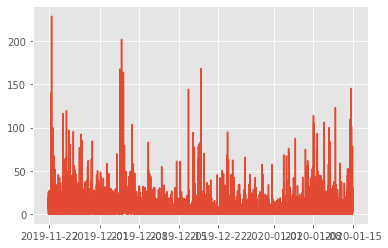

In [27]:
plt.plot(df.index, df['high'] - df['close'])

In [28]:
# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

In [29]:
df.head()

open    close     high      low   timestamp  \
datetime                                                              
2019-11-21 20:30:00  7625.38  7626.31  7632.30  7623.67  1574368200   
2019-11-21 20:35:00  7625.64  7600.47  7625.64  7594.11  1574368500   
2019-11-21 20:40:00  7600.00  7598.88  7605.62  7583.80  1574368800   
2019-11-21 20:45:00  7599.79  7590.21  7600.64  7576.03  1574369100   
2019-11-21 20:50:00  7583.23  7584.00  7591.68  7579.35  1574369400   

                        volume  period   diff  
datetime                                       
2019-11-21 20:30:00  131.42956     300   8.63  
2019-11-21 20:35:00   84.75415     300  31.53  
2019-11-21 20:40:00  208.57723     300  21.82  
2019-11-21 20:45:00   92.76753     300  24.61  
2019-11-21 20:50:00  347.91620     300  12.33

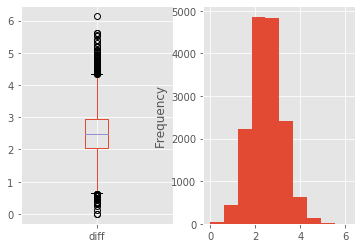

In [30]:
plt.subplot(1, 2, 1)
df['diff'].apply(lambda x: np.log(x + 1)).plot(kind='box')
plt.subplot(1, 2, 2)
df['diff'].apply(lambda x: np.log(x + 1)).plot(kind='hist')

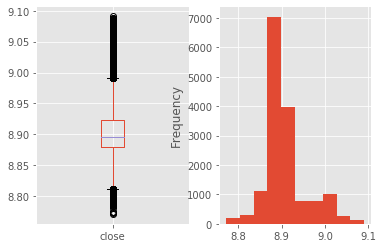

In [31]:
plt.subplot(1, 2, 1)
df['close'].apply(np.log).plot(kind='box')
plt.subplot(1, 2, 2)
df['close'].apply(np.log).plot(kind='hist')

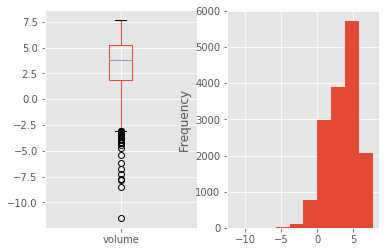

In [32]:
plt.subplot(1, 2, 1)
df['volume'].apply(np.log).plot(kind='box')
plt.subplot(1, 2, 2)
df['volume'].apply(np.log).plot(kind='hist')

In [33]:
df['timedelta'] = df.index - df.index.min()
df2 = df.copy().reset_index()
df2['day_delta'] = df2['timedelta' ]/np.timedelta64(1, 'D')
df2 = df2.set_index('day_delta')
df.head()

open    close     high      low   timestamp  \
datetime                                                              
2019-11-21 20:30:00  7625.38  7626.31  7632.30  7623.67  1574368200   
2019-11-21 20:35:00  7625.64  7600.47  7625.64  7594.11  1574368500   
2019-11-21 20:40:00  7600.00  7598.88  7605.62  7583.80  1574368800   
2019-11-21 20:45:00  7599.79  7590.21  7600.64  7576.03  1574369100   
2019-11-21 20:50:00  7583.23  7584.00  7591.68  7579.35  1574369400   

                        volume  period   diff timedelta  
datetime                                                 
2019-11-21 20:30:00  131.42956     300   8.63  00:00:00  
2019-11-21 20:35:00   84.75415     300  31.53  00:05:00  
2019-11-21 20:40:00  208.57723     300  21.82  00:10:00  
2019-11-21 20:45:00   92.76753     300  24.61  00:15:00  
2019-11-21 20:50:00  347.91620     300  12.33  00:20:00

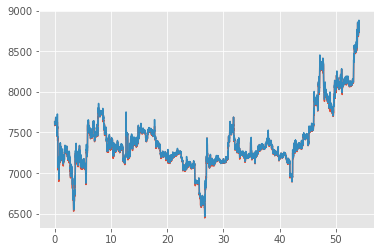

In [34]:
plt.plot(df2.index, df2[['close', 'high']])

In [35]:
df.head()

open    close     high      low   timestamp  \
datetime                                                              
2019-11-21 20:30:00  7625.38  7626.31  7632.30  7623.67  1574368200   
2019-11-21 20:35:00  7625.64  7600.47  7625.64  7594.11  1574368500   
2019-11-21 20:40:00  7600.00  7598.88  7605.62  7583.80  1574368800   
2019-11-21 20:45:00  7599.79  7590.21  7600.64  7576.03  1574369100   
2019-11-21 20:50:00  7583.23  7584.00  7591.68  7579.35  1574369400   

                        volume  period   diff timedelta  
datetime                                                 
2019-11-21 20:30:00  131.42956     300   8.63  00:00:00  
2019-11-21 20:35:00   84.75415     300  31.53  00:05:00  
2019-11-21 20:40:00  208.57723     300  21.82  00:10:00  
2019-11-21 20:45:00   92.76753     300  24.61  00:15:00  
2019-11-21 20:50:00  347.91620     300  12.33  00:20:00

In [36]:
df['rownum'] = range(len(df))
df.head()

open    close     high      low   timestamp  \
datetime                                                              
2019-11-21 20:30:00  7625.38  7626.31  7632.30  7623.67  1574368200   
2019-11-21 20:35:00  7625.64  7600.47  7625.64  7594.11  1574368500   
2019-11-21 20:40:00  7600.00  7598.88  7605.62  7583.80  1574368800   
2019-11-21 20:45:00  7599.79  7590.21  7600.64  7576.03  1574369100   
2019-11-21 20:50:00  7583.23  7584.00  7591.68  7579.35  1574369400   

                        volume  period   diff timedelta  rownum  
datetime                                                         
2019-11-21 20:30:00  131.42956     300   8.63  00:00:00       0  
2019-11-21 20:35:00   84.75415     300  31.53  00:05:00       1  
2019-11-21 20:40:00  208.57723     300  21.82  00:10:00       2  
2019-11-21 20:45:00   92.76753     300  24.61  00:15:00       3  
2019-11-21 20:50:00  347.91620     300  12.33  00:20:00       4

In [37]:
import statsmodels.formula.api as smf
df['closelog'] = np.log(df['close'])
linear_model = smf.ols('closelog ~ rownum', data=df).fit()
linear_model.summary(), linear_model.params

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:               closelog   R-squared:                       0.228
 Model:                            OLS   Adj. R-squared:                  0.228
 Method:                 Least Squares   F-statistic:                     4611.
 Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
 Time:                        14:41:41   Log-Likelihood:                 27270.
 No. Observations:               15595   AIC:                        -5.454e+04
 Df Residuals:                   15593   BIC:                        -5.452e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

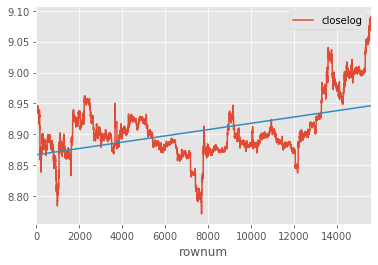

In [38]:
pred = linear_model.predict()
df.plot(kind='line', x='rownum', y='closelog')
plt.plot(df.rownum, pred, '-')

In [39]:
# slow to render
# linear_model.resid.plot(kind='bar')

In [40]:
mask = df.index > '2019-12-22'
df[mask]

open    close     high      low   timestamp  \
datetime                                                              
2019-12-22 00:05:00  7126.99  7128.73  7129.72  7126.99  1576973100   
2019-12-22 00:10:00  7128.65  7126.67  7130.69  7126.60  1576973400   
2019-12-22 00:15:00  7126.43  7127.69  7127.96  7124.97  1576973700   
2019-12-22 00:20:00  7127.93  7127.93  7127.93  7127.93  1576974000   
2019-12-22 00:25:00  7126.46  7128.35  7128.62  7125.53  1576974300   
2019-12-22 00:30:00  7128.35  7128.16  7129.52  7127.90  1576974600   
2019-12-22 00:35:00  7126.88  7128.51  7128.51  7125.95  1576974900   
2019-12-22 00:40:00  7129.21  7127.18  7129.51  7125.84  1576975200   
2019-12-22 00:45:00  7126.86  7126.90  7126.91  7126.52  1576975500   
2019-12-22 00:50:00  7127.90  7131.66  7132.37  7127.90  1576975800   
2019-12-22 00:55:00  7131.39  7131.76  7132.00  7129.61  1576976100   
2019-12-22 01:00:00  7132.99  7133.53  7133.53  7131.32  1576976400   
2019-12-22 01:05:00  7133.54  7133.16  7136.06  7132.23  1576976700   
2019-12-22 01:10:00  7133.29  7134.78  7135.68  7132.95  1576977000   
2019-12-22 01:15:00  7134.62  7139.39  7140.51  7134.62  1576977300   
2019-12-22 01:20:00  7138.39  7136.52  7138.39  7135.69  1576977600   
2019-12-22 01:25:00  7137.51  7138.74  7139.99  7137.51  1576977900   
2019-12-22 01:30:00  7139.14  7138.26  7141.36  7138.07  1576978200   
2019-12-22 01:35:00  7138.50  7139.41  7140.90  7138.08  1576978500   
2019-12-22 01:40:00  7139.85  7142.40  7143.94  7139.85  1576978800   
2019-12-22 01:45:00  7141.19  7141.33  7142.61  7140.64  1576979100   
2019-12-22 01:50:00  7140.84  7141.92  7142.17  7140.84  1576979400   
2019-12-22 01:55:00  7142.35  7144.91  7144.91  7140.79  1576979700   
2019-12-22 02:00:00  7144.92  7145.29  7146.23  7143.01  1576980000   
2019-12-22 02:05:00  7145.29  7140.95  7145.29  7139.85  1576980300   
2019-12-22 02:10:00  7140.85  7143.47  7143.47  7139.87  1576980600   
2019-12-22 02:15:00  7143.50  7144.57  7145.74  7143.50  1576980900   
2019-12-22 02:20:00  7144.86  7144.49  7145.68  7144.49  1576981200   
2019-12-22 02:25:00  7144.50  7144.99  7145.88  7144.49  1576981500   
2019-12-22 02:30:00  7145.28  7144.62  7145.80  7143.87  1576981800   
...                      ...      ...      ...      ...         ...   
2020-01-14 21:35:00  8712.92  8719.70  8721.56  8712.92  1579037700   
2020-01-14 21:40:00  8718.94  8725.22  8728.20  8713.84  1579038000   
2020-01-14 21:45:00  8725.34  8731.88  8732.30  8721.99  1579038300   
2020-01-14 21:50:00  8732.61  8751.44  8751.44  8732.61  1579038600   
2020-01-14 21:55:00  8750.92  8729.25  8759.73  8728.83  1579038900   
2020-01-14 22:00:00  8734.50  8731.56  8738.97  8730.29  1579039200   
2020-01-14 22:05:00  8731.95  8740.91  8743.88  8725.18  1579039500   
2020-01-14 22:10:00  8741.27  8749.43  8749.43  8737.50  1579039800   
2020-01-14 22:15:00  8749.12  8743.53  8758.48  8743.48  1579040100   
2020-01-14 22:20:00  8744.64  8754.20  8754.20  8744.64  1579040400   
2020-01-14 22:25:00  8753.11  8768.26  8769.11  8752.80  1579040700   
2020-01-14 22:30:00  8768.48  8773.32  8773.32  8762.53  1579041000   
2020-01-14 22:35:00  8773.33  8780.45  8790.16  8772.90  1579041300   
2020-01-14 22:40:00  8780.45  8760.03  8790.64  8756.68  1579041600   
2020-01-14 22:45:00  8759.69  8765.15  8772.18  8742.16  1579041900   
2020-01-14 22:50:00  8765.25  8750.58  8770.06  8742.53  1579042200   
2020-01-14 22:55:00  8750.61  8735.14  8763.74  8730.16  1579042500   
2020-01-14 23:00:00  8735.18  8727.78  8749.62  8723.54  1579042800   
2020-01-14 23:05:00  8727.23  8733.32  8738.19  8721.95  1579043100   
2020-01-14 23:10:00  8733.11  8761.71  8763.99  8733.11  1579043400   
2020-01-14 23:15:00  8758.08  8785.20  8786.98  8752.63  1579043700   
2020-01-14 23:20:00  8786.46  8793.23  8816.78  8778.70  1579044000   
2020-01-14 23:25:00  8789.47  8832.13  8839.99  8786.14  1579044300   
2020-01-14 23:30:00  8834.10  8874.98  8880.45  

In [41]:
df[mask][['close', 'high']]

close     high
datetime                             
2019-12-22 00:05:00  7128.73  7129.72
2019-12-22 00:10:00  7126.67  7130.69
2019-12-22 00:15:00  7127.69  7127.96
2019-12-22 00:20:00  7127.93  7127.93
2019-12-22 00:25:00  7128.35  7128.62
2019-12-22 00:30:00  7128.16  7129.52
2019-12-22 00:35:00  7128.51  7128.51
2019-12-22 00:40:00  7127.18  7129.51
2019-12-22 00:45:00  7126.90  7126.91
2019-12-22 00:50:00  7131.66  7132.37
2019-12-22 00:55:00  7131.76  7132.00
2019-12-22 01:00:00  7133.53  7133.53
2019-12-22 01:05:00  7133.16  7136.06
2019-12-22 01:10:00  7134.78  7135.68
2019-12-22 01:15:00  7139.39  7140.51
2019-12-22 01:20:00  7136.52  7138.39
2019-12-22 01:25:00  7138.74  7139.99
2019-12-22 01:30:00  7138.26  7141.36
2019-12-22 01:35:00  7139.41  7140.90
2019-12-22 01:40:00  7142.40  7143.94
2019-12-22 01:45:00  7141.33  7142.61
2019-12-22 01:50:00  7141.92  7142.17
2019-12-22 01:55:00  7144.91  7144.91
2019-12-22 02:00:00  7145.29  7146.23
2019-12-22 02:05:00  7140.95  7145.29
2019-12-22 02:10:00  7143.47  7143.47
2019-12-22 02:15:00  7144.57  7145.74
2019-12-22 02:20:00  7144.49  7145.68
2019-12-22 02:25:00  7144.99  7145.88
2019-12-22 02:30:00  7144.62  7145.80
...                      ...      ...
2020-01-14 21:35:00  8719.70  8721.56
2020-01-14 21:40:00  8725.22  8728.20
2020-01-14 21:45:00  8731.88  8732.30
2020-01-14 21:50:00  8751.44  8751.44
2020-01-14 21:55:00  8729.25  8759.73
2020-01-14 22:00:00  8731.56  8738.97
2020-01-14 22:05:00  8740.91  8743.88
2020-01-14 22:10:00  8749.43  8749.43
2020-01-14 22:15:00  8743.53  8758.48
2020-01-14 22:20:00  8754.20  8754.20
2020-01-14 22:25:00  8768.26  8769.11
2020-01-14 22:30:00  8773.32  8773.32
2020-01-14 22:35:00  8780.45  8790.16
2020-01-14 22:40:00  8760.03  8790.64
2020-01-14 22:45:00  8765.15  8772.18
2020-01-14 22:50:00  8750.58  8770.06
2020-01-14 22:55:00  8735.14  8763.74
2020-01-14 23:00:00  8727.78  8749.62
2020-01-14 23:05:00  8733.32  8738.19
2020-01-14 23:10:00  8761.71  8763.99
2020-01-14 23:15:00  8785.20  8786.98
2020-01-14 23:20:00  8793.23  8816.78
2020-01-14 23:25:00  8832.13  8839.99
2020-01-14 23:30:00  8874.98  8880.45
2020-01-14 23:35:00  8836.05  8878.93
2020-01-14 23:40:00  8815.43  8857.41
2020-01-14 23:45:00  8834.16  8845.88
2020-01-14 23:50:00  8852.21  8867.72
2020-01-14 23:55:00  8808.05  8851.87
2020-01-15 00:00:00  8733.57  8811.69

[6912 rows x 2 columns]

### Price Difference in Shifted Candlestick series

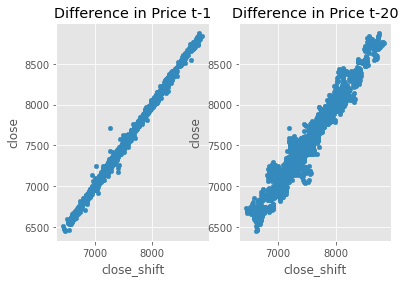

In [42]:
fig, axes = plt.subplots(ncols=2)
df['close_shift'] = df['close'].shift().fillna(method='bfill')
df.plot(kind='scatter', y='close', x='close_shift', ax=axes[0], title='Difference in Price t-1')
df['close_shift'] = df['close'].shift(20).fillna(method='bfill')
df.plot(kind='scatter', y='close', x='close_shift', ax=axes[1], title='Difference in Price t-20')

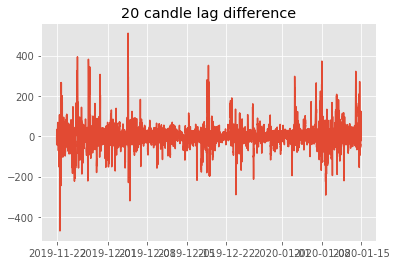

In [43]:
df['close_shift_diff'] = df['close'] - df['close_shift']
plt.title('20 candle lag difference')
plt.plot(df.index, df['close_shift_diff'])

# Rolling Average

In [44]:
def moving_average(signal, period):
    buffer = []
    for i in range(period, len(signal)):
        buffer.append(signal[i - period : i].mean())
    return buffer

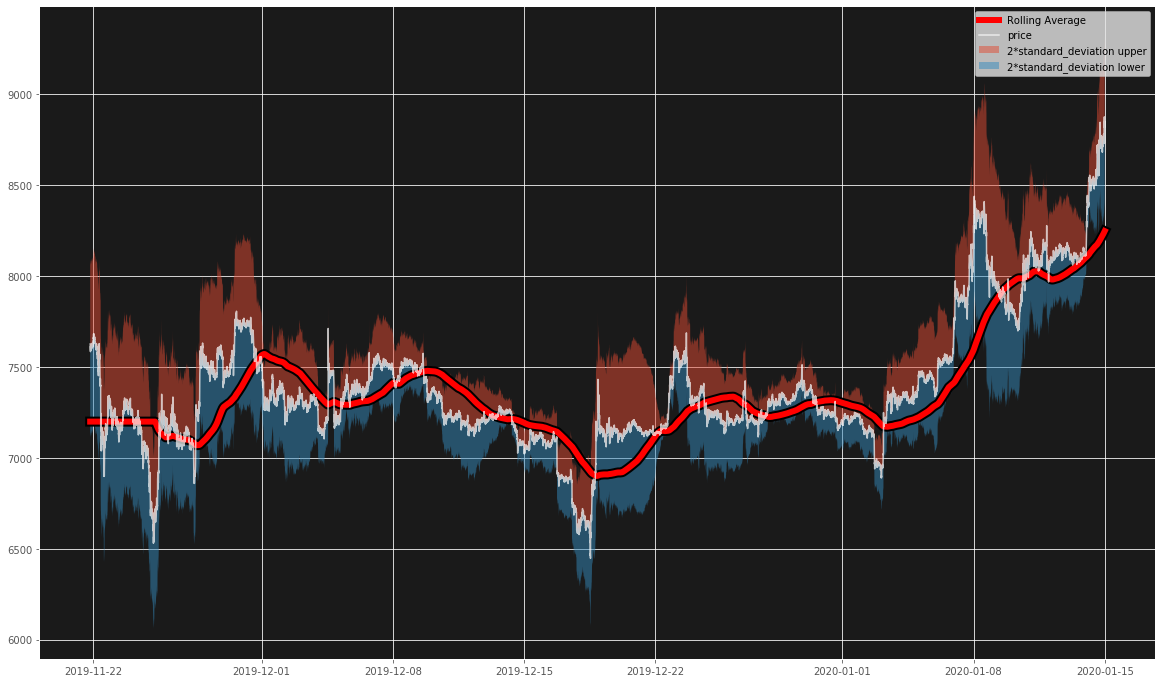

In [45]:
rcParams['figure.figsize'] = 20,12
fig, ax = plt.subplots(1, 1)
ax.set_facecolor('black')
ax.set_facecolor((0.1, 0.1, 0.1))
plt.plot(df.index, df['close'].rolling(1000).mean().fillna(method='bfill'), linewidth=10, color='black')
plt.plot(df.index, df['close'].rolling(1000).mean().fillna(method='bfill'), label='Rolling Average', linewidth=6, color='red')
plt.fill_between(df.index, df['close'], df['close']+2*df['close'].rolling(1000).std().fillna(method='bfill'), label='2*standard_deviation upper', alpha=0.5)
plt.fill_between(df.index, df['close'], df['close']-2*df['close'].rolling(1000).std().fillna(method='bfill'), label='2*standard_deviation lower', alpha=0.5)
plt.plot(df.index, df['close'], label='price', color='white', alpha=0.7)
plt.legend()

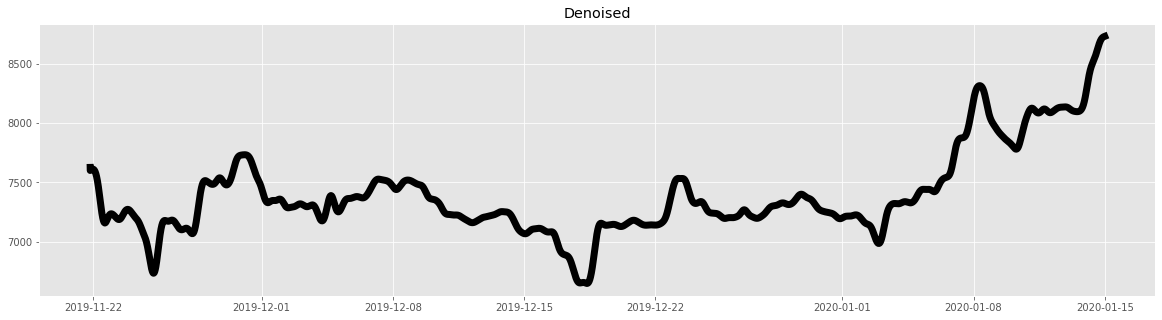

In [46]:
rcParams['figure.figsize'] = 20,5
def denoise(signal, repeat):
    "repeat: how smooth to make the graph"
    copy_signal = np.copy(signal)
    for j in range(repeat):
        for i in range(3, len(signal)):
            # set previous timestep to be between the timestep i and i - 2
            copy_signal[i - 1] = (copy_signal[i - 2] + copy_signal[i]) / 2
    return copy_signal

denoised = denoise(df['close'], 1000)
plt.title('Denoised')
plt.plot(df.index, denoised, linewidth=7, color='black')

# Autocorrelation

From reference article
>Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged
version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with 
series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
>
>Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a 
lagged version of itself but after eliminating the variations already explained by the intervening
comparisons. Eg at lag 5, it will check the correlation but remove the effects 
already explained by lags 1 to 4.


From wikipedia
>In statistics, the autocorrelation of a real or complex random process is the Pearson correlation between values of the process at different times, as a function of the two times or of the time lag 



$p_{XX}(t_1, t_2) =
\frac{ E[(X_{t_1} - \mu_{t_1}) }
{ (\overline{X_{t_2} - \mu_{t_2}})] }$

In [47]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = pd.Series(acf(df['diff'], nlags=15, fft=True))

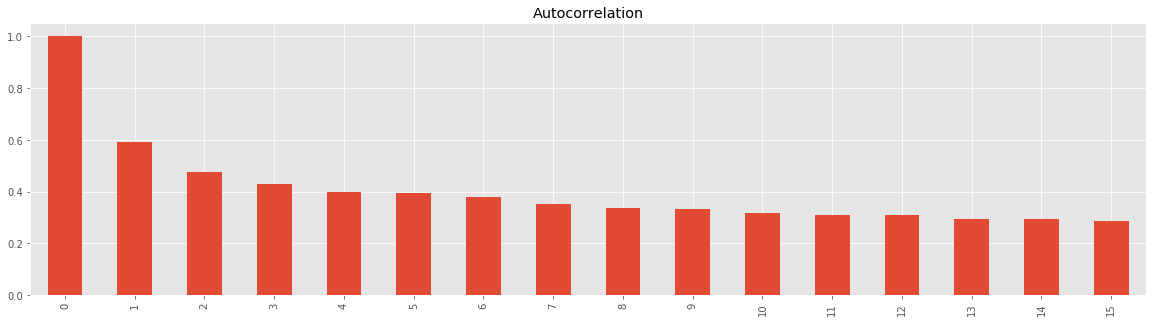

In [48]:
plt.title('Autocorrelation')
rcParams['figure.figsize'] = 20,6
lag_acf.plot(kind='bar')

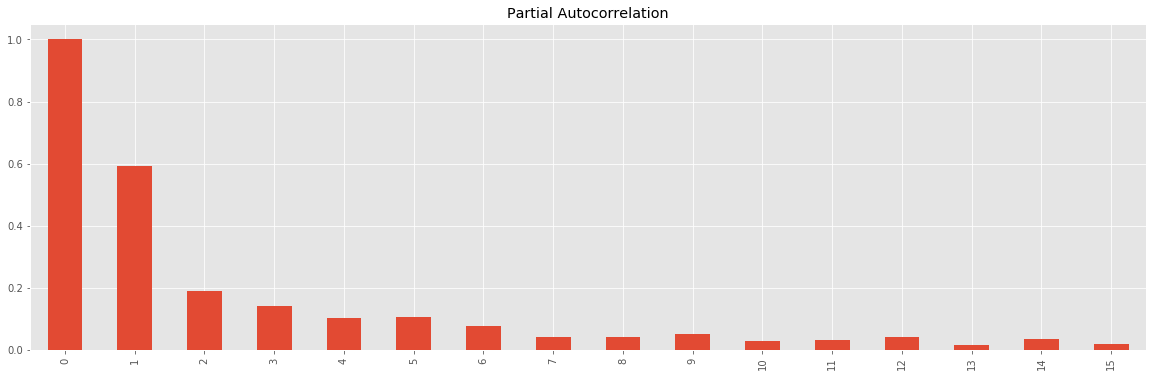

In [49]:
plt.title('Partial Autocorrelation')
rcParams['figure.figsize'] = 20,6
lag_pacf = pd.Series(pacf(df['diff'], nlags=15, method='ols'))
lag_pacf.plot(kind='bar')

In [50]:
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Series.
 |  
 |      .. versionchanged ::

# Technical Analysis Library

In [51]:
import ta
df = ta.add_all_ta_features(df, "open", "high", "low", "close", "volume").fillna(method='bfill')

/home/me/anaconda3/lib/python3.7/site-packages/ta/trend.py:543: RuntimeWarning:

invalid value encountered in double_scalars

/home/me/anaconda3/lib/python3.7/site-packages/ta/trend.py:547: RuntimeWarning:

invalid value encountered in double_scalars



In [52]:
df.columns

Index(['open', 'close', 'high', 'low', 'timestamp', 'volume', 'period', 'diff',
       'timedelta', 'rownum', 'closelog', 'close_shift', 'close_shift_diff',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volatility_atr',
       'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch',
       'volatility_dchi', 'volatility_dcli', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_a',
       'trend_

In [53]:
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.stats import pearsonr

In [54]:
'volume_adi', 'volume_obv', 'volume_cmf', 
'volume_fi', 'volume_em', 'volume_vpt', 'volume_nvi', 'volatility_atr', 
'volatility_bbh', 'volatility_bbl', 'volatility_bbm', 'volatility_bbhi', 
'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl', 
'volatility_kchi', 'volatility_kcli', 'volatility_dch', 'volatility_dcl', 
'volatility_dchi', 'volatility_dcli', 'trend_macd', 'trend_macd_signal', 
'trend_macd_diff', 'trend_ema_fast', 'trend_ema_slow', 
'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos', 
'trend_vortex_ind_neg', 'trend_vortex_diff', 'trend_trix', 
'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst', 
'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_a', 
'trend_ichimoku_b', 'trend_visual_ichimoku_a', 'trend_visual_ichimoku_b', 
'trend_aroon_up', 'trend_aroon_down', 'trend_aroon_ind', 'momentum_rsi', 
'momentum_mfi', 'momentum_tsi', 'momentum_uo', 'momentum_stoch', 
'momentum_stoch_signal', 'momentum_wr', 'momentum_ao',  
'others_dr', 'others_dlr', 'others_cr', 'close_diff', 

('others_dr', 'others_dlr', 'others_cr', 'close_diff')

In [55]:
from cesium.featurize import featurize_time_series

In [56]:
import dask.compatibility

In [57]:
dir(dask.compatibility)

['LooseVersion',
 'PY_VERSION',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'apply',
 'dataclass_fields',
 'is_dataclass',
 'reraise',
 'sys',
 'unicode']

In [58]:
# arrow library for datetime

# Geometric Mean Rate
second order approximation
$g = \mu - \frac{\sigma^2}{2}$

In [59]:
# More appropriate for time series 
# clustering = AgglomerativeClustering(n_clusters=50, linkage='ward')

In [61]:
test = sql.get_some_candles({'exchange_id':'bitfinex', 'trading_pair':'eth_btc', 'start':1577836800, 'period':300})

open     close      high       low   timestamp  \
datetime                                                                  
2020-01-01 00:00:00  0.017958  0.017951  0.017958  0.017951  1577836800   
2020-01-01 00:05:00  0.017956  0.017943  0.017956  0.017943  1577837100   
2020-01-01 00:10:00  0.017940  0.017935  0.017940  0.017935  1577837400   
2020-01-01 00:15:00  0.017932  0.017932  0.017938  0.017932  1577837700   
2020-01-01 00:20:00  0.017935  0.017935  0.017935  0.017935  1577838000   
2020-01-01 00:25:00  0.017933  0.017933  0.017933  0.017933  1577838300   
2020-01-01 00:30:00  0.017933  0.017938  0.017938  0.017933  1577838600   
2020-01-01 00:35:00  0.017938  0.017939  0.017939  0.017938  1577838900   
2020-01-01 00:40:00  0.017939  0.017945  0.017945  0.017939  1577839200   
2020-01-01 00:45:00  0.017941  0.017941  0.017941  0.017941  1577839500   
2020-01-01 00:55:00  0.017941  0.017946  0.017946  0.017941  1577840100   
2020-01-01 01:00:00  0.017942  0.017950  0.017950  0.017942  1577840400   
2020-01-01 01:05:00  0.017950  0.017950  0.017950  0.017950  1577840700   
2020-01-01 01:10:00  0.017948  0.017948  0.017948  0.017948  1577841000   
2020-01-01 01:20:00  0.017950  0.018012  0.018017  0.017950  1577841600   
2020-01-01 01:25:00  0.018015  0.018054  0.018084  0.018015  1577841900   
2020-01-01 01:30:00  0.018070  0.018070  0.018071  0.018070  1577842200   
2020-01-01 01:40:00  0.018067  0.018066  0.018067  0.018066  1577842800   
2020-01-01 01:45:00  0.018066  0.018048  0.018066  0.018048  1577843100   
2020-01-01 01:50:00  0.018047  0.018064  0.018081  0.018047  1577843400   
2020-01-01 01:55:00  0.018062  0.018090  0.018090  0.018062  1577843700   
2020-01-01 02:00:00  0.018094  0.018079  0.018131  0.018079  1577844000   
2020-01-01 02:05:00  0.018077  0.018077  0.018077  0.018077  1577844300   
2020-01-01 02:15:00  0.018074  0.018087  0.018087  0.018073  1577844900   
2020-01-01 02:20:00  0.018095  0.018090  0.018095  0.018090  1577845200   
2020-01-01 02:25:00  0.018090  0.018090  0.018090  0.018090  1577845500   
2020-01-01 02:30:00  0.018090  0.018090  0.018090  0.018090  1577845800   
2020-01-01 02:35:00  0.018090  0.018088  0.018090  0.018088  1577846100   
2020-01-01 02:40:00  0.018088  0.018073  0.018088  0.018072  1577846400   
2020-01-01 02:50:00  0.018072  0.018071  0.018072  0.018071  1577847000   
...                       ...       ...       ...       ...         ...   
2020-01-15 23:35:00  0.018825  0.018812  0.018827  0.018812  1579131300   
2020-01-15 23:40:00  0.018812  0.018833  0.018833  0.018812  1579131600   
2020-01-15 23:45:00  0.018834  0.018834  0.018834  0.018834  1579131900   
2020-01-15 23:50:00  0.018834  0.018827  0.018864  0.018827  1579132200   
2020-01-15 23:55:00  0.018840  0.018873  0.018873  0.018840  1579132500   
2020-01-16 00:00:00  0.018867  0.018879  0.018879  0.018865  1579132800   
2020-01-16 00:05:00  0.018876  0.018895  0.018901  0.018876  1579133100   
2020-01-16 00:10:00  0.018893  0.018850  0.018893  0.018850  1579133400   
2020-01-16 00:15:00  0.018851  0.018837  0.018860  0.018824  1579133700   
2020-01-16 00:20:00  0.018745  0.018765  0.018776  0.018738  1579134000   
2020-01-16 00:25:00  0.018773  0.018745  0.018783  0.018690  1579134300   
2020-01-16 00:30:00  0.018730  0.018701  0.018733  0.018701  1579134600   
2020-01-16 00:35:00  0.018701  0.018651  0.018701  0.018650  1579134900   
2020-01-16 00:40:00  0.018657  0.018665  0.018665  0.018637  1579135200   
2020-01-16 00:45:00  0.018679  0.018664  0.018679  0.018664  1579135500   
2020-01-16 00:50:00  0.018685  0.018689  0.018689  0.018685  1579135800   
2020-01-16 00:55:00  0.018690  0.018706  0.018718  0.018690  1579136100   
2020-01-16 01:00:00  0.018706  0.018720  0.018720  0.018706  1579136400   
2020-01-16 01:05:00  0.018731  0.018708  0.018731  0.018708  1579136700   
2020-01-16 01:15:00  0.018672  0.018672  0.018672  0.018672  1579137300   
2020-01-16 01:20:00  0.018599  0.018629  0.018655 

In [63]:
dir(plot)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'candlestick',
 'go',
 'h',
 'logging',
 'plot_all_candlesticks',
 'plotly',
 'sql']

In [64]:
help(plot.candlestick)

Help on function candlestick in module cryptolytic.viz.plot:

candlestick(df)



In [65]:
plot.candlestick(test)